## Do all preliminary operations

In [1]:
%matplotlib inline

In [2]:
import os
import json
import matplotlib.pyplot as plt

In [3]:
json_wd = os.path.join(os.getcwd(),'json')
print (json_wd)

C:\Users\ephra\Documents\GitHub\PIDA_Project\json


In [4]:
from os import listdir
from os.path import isfile, join

jsonfiles = [f for f in listdir(json_wd) if isfile(join(json_wd, f))]

In [5]:
print(len(jsonfiles))

34


## Import JSON files

In [6]:
#input all json files and load into list
all_files=[]
for filename in jsonfiles:
    print(filename)#allows for easy debugging of JSON files
    file=open(os.path.join(json_wd, filename))
    data=json.load(file)
    all_files.append(data)
    file.close()
    #data=json.loads(filename)
print (all_files[0])

311 service request 2010 to present.json
Active_Projects_Under_Construction.json
City-owned_and_Leased_Property.json
Citywide_payroll_data.json
Civil Service List (Active).json
Directory_Of_Homebase_Locations.json
DOB Permit Issuance.json
DOB_Complaints_Received.json
DOB_ECB_Violations.json
DOB_Job_Application_Filings.json
DOB_NOW_Build_–_Approved_Permits.json
DOB_Violations.json
DOHMH_New_York_City_Restaurant_Inspection_Results.json
DYCD_after-school_programs.json
Film Permits.json
For Hire Vehicles (FHV) - Active Drivers.json
For_Hire_Vehicles_(FHV)_-_Active.json
Greenbook.json
Housing_Maintenance_Code_Violations.json
Legally_Operating_Businesses.json
Mapped_In_NY_Companies.json
Medallion Vehicles - Authorized.json
Medallion_Drivers_–_Passenger_Assistance_Trained.json
Medallion_Vehicles_-_Inactive.json
Most_Popular_Baby_Names.json
New_York_City_Leading_Causes_of_Death.json
New_York_City_Population_By_Census_Tracts.json
NYPD_Complaint_Data_Current_YTD.json
NYPD_Complaint_Data_Historic

## Make all the links using tags

In [7]:
all_links=[]
dataset_list=[]
for index, file in enumerate(all_files):
    #print (list(file.keys())[0], "is the name of the dataset")
    name=list(file.keys())[0]
    dataset_list.append(name)
    #print (list(file[name].keys()), "are the column names")
    for col in file[name].keys():
        #print ("Under column ", col, "are tags ", file[name][col])
        for tag in file[name][col]:
            #print ("Tag: ", tag)
            for secondindex in range (index+1, len(all_files)):
                secondname=list(all_files[secondindex].keys())[0]
                for secondcol in all_files[secondindex][secondname].keys():
                    #print ("Under second column ", secondcol, "are tags ", all_files[secondindex][secondname][secondcol])
                    for secondtag in all_files[secondindex][secondname][secondcol]:
                        #print ("Tag: ", secondtag)
                        #do all checking for common tags here
                        if tag.upper()==secondtag.upper() and index is not secondindex:
                            print (name, "and", secondname, "are linked at column", col, "and column", secondcol, "through tag", tag)
                            all_links.append([name.upper(), col.upper(), tag.upper() , secondname.upper(), secondcol.upper(), secondtag.upper()])
print (len(all_links))

311 Service Requests from 2010 to Present and DOHMH New York City Restaurant Inspection Results are linked at column created_date and column inspection_date through tag dates
311 Service Requests from 2010 to Present and Medallion Vehicles - Authorized are linked at column created_date and column expiration_date through tag dates
311 Service Requests from 2010 to Present and Most Popular Baby Names by Sex and Mother's Ethnic Group, New York City are linked at column created_date and column brth_yr through tag dates
311 Service Requests from 2010 to Present and New York City Population By Census Tracts are linked at column created_date and column year through tag dates
311 Service Requests from 2010 to Present and Parking Violations Issued - Fiscal Year 2018 are linked at column created_date and column issue_date through tag dates
311 Service Requests from 2010 to Present and DOHMH New York City Restaurant Inspection Results are linked at column closed_date and column inspection_date th

311 Service Requests from 2010 to Present and For Hire Vehicles (FHV) - Active are linked at column borough and column base_address through tag location
311 Service Requests from 2010 to Present and Legally Operating Businesses are linked at column borough and column location through tag location
311 Service Requests from 2010 to Present and Mapped In NY Companies are linked at column borough and column city through tag location
311 Service Requests from 2010 to Present and Medallion Vehicles - Authorized are linked at column borough and column agent_address through tag location
311 Service Requests from 2010 to Present and New York City Population By Census Tracts are linked at column borough and column borough through tag location
311 Service Requests from 2010 to Present and NYPD Complaint Data Current YTD are linked at column borough and column lat_lon through tag location
311 Service Requests from 2010 to Present and Parking Violations Issued - Fiscal Year 2018 are linked at colum

Active Projects Under Construction and DOB Job Application Filings are linked at column building_address and column street_name through tag streetaddress
Active Projects Under Construction and DOB Job Application Filings are linked at column building_address and column owner's_house_street_name through tag streetaddress
Active Projects Under Construction and DOB NOW: Build â€“ Approved Permits are linked at column building_address and column street_name through tag streetaddress
Active Projects Under Construction and DOB NOW: Build â€“ Approved Permits are linked at column building_address and column owner_street_address through tag streetaddress
Active Projects Under Construction and DOB Violations are linked at column building_address and column street through tag streetaddress
Active Projects Under Construction and DOHMH New York City Restaurant Inspection Results are linked at column building_address and column street through tag streetaddress
Active Projects Under Construction and

City-owned and Leased Property (Local Law 48 of 2011) and DOB ECB Violations are linked at column address and column respondent_street through tag streetaddress
City-owned and Leased Property (Local Law 48 of 2011) and DOB Job Application Filings are linked at column address and column street_name through tag streetaddress
City-owned and Leased Property (Local Law 48 of 2011) and DOB Job Application Filings are linked at column address and column owner's_house_street_name through tag streetaddress
City-owned and Leased Property (Local Law 48 of 2011) and DOB NOW: Build â€“ Approved Permits are linked at column address and column street_name through tag streetaddress
City-owned and Leased Property (Local Law 48 of 2011) and DOB NOW: Build â€“ Approved Permits are linked at column address and column owner_street_address through tag streetaddress
City-owned and Leased Property (Local Law 48 of 2011) and DOB Violations are linked at column address and column street through tag streetaddres

Citywide Payroll Data and DOB Permit Issuance are linked at column first_name and column superintendent_name through tag name
Citywide Payroll Data and DOB Permit Issuance are linked at column first_name and column owner_s_first_name through tag name
Citywide Payroll Data and DOB Permit Issuance are linked at column first_name and column owner_s_last_name through tag name
Citywide Payroll Data and DOB ECB Violations are linked at column first_name and column respondent_name through tag name
Citywide Payroll Data and DOB Job Application Filings are linked at column first_name and column Applicant's_first_name through tag name
Citywide Payroll Data and DOB Job Application Filings are linked at column first_name and column applicant's_last_name through tag name
Citywide Payroll Data and DOB Job Application Filings are linked at column first_name and column owner's_first_name through tag name
Citywide Payroll Data and DOB Job Application Filings are linked at column first_name and column o

Civil Service List (Active) and Medallion Vehicles - Inactive are linked at column last_name and column name through tag name
Civil Service List (Active) and Most Popular Baby Names by Sex and Mother's Ethnic Group, New York City are linked at column last_name and column nm through tag name
Civil Service List (Active) and OATH Hearings Division Case Status are linked at column last_name and column respondent_first_name through tag name
Civil Service List (Active) and OATH Hearings Division Case Status are linked at column last_name and column respondent_last_name through tag name
Civil Service List (Active) and Street Hail Livery (SHL) Drivers - Active are linked at column last_name and column name through tag name
Civil Service List (Active) and Street Hail Livery (SHL) Permits are linked at column last_name and column name through tag name
Directory Of Homebase Locations and DOB Permit Issuance are linked at column service_area_zip_code and column zip_code through tag zipcode
Directo

DOB Permit Issuance and DOB Job Application Filings are linked at column street_name and column gis_latitude through tag location
DOB Permit Issuance and DOB Job Application Filings are linked at column street_name and column gis_longitude through tag location
DOB Permit Issuance and DYCD after-school programs: Beacon Programs are linked at column street_name and column location_1 through tag location
DOB Permit Issuance and For Hire Vehicles (FHV) - Active are linked at column street_name and column base_address through tag location
DOB Permit Issuance and Legally Operating Businesses are linked at column street_name and column location through tag location
DOB Permit Issuance and Mapped In NY Companies are linked at column street_name and column city through tag location
DOB Permit Issuance and Medallion Vehicles - Authorized are linked at column street_name and column agent_address through tag location
DOB Permit Issuance and New York City Population By Census Tracts are linked at c

DOB Permit Issuance and DOB NOW: Build â€“ Approved Permits are linked at column site_safety_mgr's_last_name and column applicant_last_name through tag name
DOB Permit Issuance and DOB NOW: Build â€“ Approved Permits are linked at column site_safety_mgr's_last_name and column filing_representative_first_name through tag name
DOB Permit Issuance and DOB NOW: Build â€“ Approved Permits are linked at column site_safety_mgr's_last_name and column filing_representative_last_name through tag name
DOB Permit Issuance and DOB NOW: Build â€“ Approved Permits are linked at column site_safety_mgr's_last_name and column owner_name through tag name
DOB Permit Issuance and For Hire Vehicles (FHV) - Active Drivers are linked at column site_safety_mgr's_last_name and column name through tag name
DOB Permit Issuance and For Hire Vehicles (FHV) - Active are linked at column site_safety_mgr's_last_name and column name through tag name
DOB Permit Issuance and Greenbook are linked at column site_safety_mgr

DOB Permit Issuance and NYPD Complaint Data Historic are linked at column gis_longitude and column longitude through tag longitude
DOB Permit Issuance and Queens Library Branches are linked at column gis_longitude and column longitude through tag longitude
DOB Complaints Received and Film Permits are linked at column date_entered and column startdatetime through tag date
DOB Complaints Received and Film Permits are linked at column date_entered and column enddatetime through tag date
DOB Complaints Received and For Hire Vehicles (FHV) - Active are linked at column date_entered and column expiration_date through tag date
DOB Complaints Received and OATH Hearings Division Case Status are linked at column date_entered and column hearing_date through tag date
DOB Complaints Received and Street Hail Livery (SHL) Drivers - Active are linked at column date_entered and column expiration_date through tag date
DOB Complaints Received and Street Hail Livery (SHL) Drivers - Active are linked at co

DOB Job Application Filings and DOB NOW: Build â€“ Approved Permits are linked at column Applicant's_first_name and column applicant_last_name through tag name
DOB Job Application Filings and DOB NOW: Build â€“ Approved Permits are linked at column Applicant's_first_name and column filing_representative_first_name through tag name
DOB Job Application Filings and DOB NOW: Build â€“ Approved Permits are linked at column Applicant's_first_name and column filing_representative_last_name through tag name
DOB Job Application Filings and DOB NOW: Build â€“ Approved Permits are linked at column Applicant's_first_name and column owner_name through tag name
DOB Job Application Filings and For Hire Vehicles (FHV) - Active Drivers are linked at column Applicant's_first_name and column name through tag name
DOB Job Application Filings and For Hire Vehicles (FHV) - Active are linked at column Applicant's_first_name and column name through tag name
DOB Job Application Filings and Greenbook are linked

DOB Job Application Filings and NYPD Complaint Data Historic are linked at column gis_longitude and column longitude through tag longitude
DOB Job Application Filings and Queens Library Branches are linked at column gis_longitude and column longitude through tag longitude
DOB NOW: Build â€“ Approved Permits and DOB Violations are linked at column street_name and column street through tag streetaddress
DOB NOW: Build â€“ Approved Permits and DOHMH New York City Restaurant Inspection Results are linked at column street_name and column street through tag streetaddress
DOB NOW: Build â€“ Approved Permits and DYCD after-school programs: Beacon Programs are linked at column street_name and column address through tag streetaddress
DOB NOW: Build â€“ Approved Permits and Greenbook are linked at column street_name and column address through tag streetaddress
DOB NOW: Build â€“ Approved Permits and Housing Maintenance Code Violations are linked at column street_name and column streetname through

DOB NOW: Build â€“ Approved Permits and Medallion Vehicles - Inactive are linked at column owner_name and column name through tag name
DOB NOW: Build â€“ Approved Permits and Most Popular Baby Names by Sex and Mother's Ethnic Group, New York City are linked at column owner_name and column nm through tag name
DOB NOW: Build â€“ Approved Permits and OATH Hearings Division Case Status are linked at column owner_name and column respondent_first_name through tag name
DOB NOW: Build â€“ Approved Permits and OATH Hearings Division Case Status are linked at column owner_name and column respondent_last_name through tag name
DOB NOW: Build â€“ Approved Permits and Street Hail Livery (SHL) Drivers - Active are linked at column owner_name and column name through tag name
DOB NOW: Build â€“ Approved Permits and Street Hail Livery (SHL) Permits are linked at column owner_name and column name through tag name
DOB NOW: Build â€“ Approved Permits and DOB Violations are linked at column owner_street_add

Legally Operating Businesses and Mapped In NY Companies are linked at column location and column city through tag location
Legally Operating Businesses and Medallion Vehicles - Authorized are linked at column location and column agent_address through tag location
Legally Operating Businesses and New York City Population By Census Tracts are linked at column location and column borough through tag location
Legally Operating Businesses and NYPD Complaint Data Current YTD are linked at column location and column lat_lon through tag location
Legally Operating Businesses and Parking Violations Issued - Fiscal Year 2018 are linked at column location and column violation_location through tag location
Mapped In NY Companies and Medallion Vehicles - Authorized are linked at column city and column agent_address through tag location
Mapped In NY Companies and New York City Population By Census Tracts are linked at column city and column borough through tag location
Mapped In NY Companies and NYPD

## Reformat list for easy access

In [8]:
full_tree=[]#make tag most important
for sublist in all_links:
    tag=sublist[2]
    col1=sublist[1]
    col2=sublist[4]
    dataset1=sublist[0]
    dataset2=sublist[3]
    full_tree.append([tag, col1, dataset1, col2, dataset2])
#print (full_tree)

# Basic Data analysis 

## Number of times each tag is linked

In [9]:
tag_dict={}
for sublist in full_tree:
    try:
        tag_dict[sublist[0]]+=1
    except Exception:
        tag_dict[sublist[0]]=1
print (tag_dict)

{'DATES': 20, 'ZIPCODE': 151, 'LOCATION': 239, 'STREETADDRESS': 227, 'LATITUDE': 77, 'LONGITUDE': 66, 'NAME': 519, 'PHONE': 64, 'DATE': 32, 'TIME': 5, 'LICENSENUMBER': 10, 'GENDER': 1, 'ETHNICITY': 1}


<Container object of 13 artists>

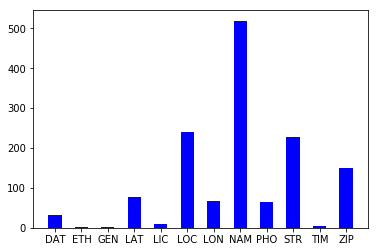

In [10]:
li=tag_dict.keys()
new_li=[]
for l in li:
    new_li.append(l[0:3])
plt.bar(new_li, tag_dict.values(), .5, color='b')#resize as needed

## Number of times each column has associated tags

In [11]:
col_dict={}
for sublist in full_tree:
    try:
        col_dict[sublist[1]]+=1
    except Exception:
        col_dict[sublist[1]]=1
    try:
        col_dict[sublist[3]]+=1
    except Exception:
        col_dict[sublist[3]]=1
print (col_dict)

{'CREATED_DATE': 5, 'INSPECTION_DATE': 6, 'EXPIRATION_DATE': 28, 'BRTH_YR': 6, 'YEAR': 6, 'ISSUE_DATE': 6, 'CLOSED_DATE': 5, 'INDIDENT_ZIP': 37, 'ZIP_CODE': 103, 'SERVICE_AREA_ZIP_CODE': 17, 'OWNER_S_ZIP_CODE': 35, 'RESPONDENT_ZIP': 17, 'ZIP': 34, 'OWNER_ZIP_CODE': 17, 'ZIPCODE': 17, 'POST_CODE': 17, 'ZIPCODE_S': 17, 'ADDRESS_ZIP': 17, 'VIOLATION_LOCATION_ZIP_CODE': 16, 'RESPONDENT_ADDRESS_ZIP_CODE': 16, 'POSTCODE': 17, 'BOROUGH': 79, 'STREET_NAME': 137, "OWNER'S_HOUSE_STREET_NAME": 76, "OWNER'S_HOUSE_NUMBER": 17, 'GIS_LATITUDE': 41, 'GIS_LONGITUDE': 39, 'LOCATION_1': 23, 'BASE_ADDRESS': 23, 'LOCATION': 43, 'CITY': 23, 'AGENT_ADDRESS': 44, 'LAT_LON': 23, 'VIOLATION_LOCATION': 23, 'BUILDING_ADDRESS': 21, 'ADDRESS': 105, 'HOUSE_STREET': 21, 'RESPONDENT_STREET': 21, 'OWNER_STREET_ADDRESS': 20, 'STREET': 42, 'STREETNAME': 21, 'ADDRESS_STREET_NAME': 21, 'VIOLATION_LOCATION_STREET_NAME': 20, 'RESPONDENT_ADDRESS_STREET_NAME': 20, 'LATITUDE': 119, 'LONGITUDE': 121, 'LAST_NAME': 96, 'FIRST_NAME

<Container object of 96 artists>

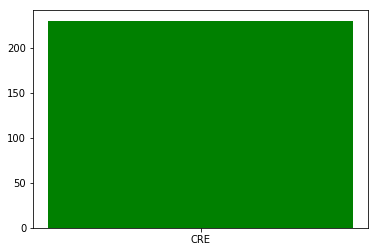

In [31]:
li=col_dict.keys()
new_li=[]
for l in li:
    new_li.append(l[0:3])
plt.bar(new_li, col_dict.values(), .5, color='g')

## Number of links each dataset has

In [13]:
dataset_dict={}
for sublist in full_tree:
    try:
        dataset_dict[sublist[2]]+=1
    except Exception:
        dataset_dict[sublist[2]]=1
    try:
        dataset_dict[sublist[4]]+=1
    except Exception:
        dataset_dict[sublist[4]]=1
print (dataset_dict)

{'311 SERVICE REQUESTS FROM 2010 TO PRESENT': 151, 'DOHMH NEW YORK CITY RESTAURANT INSPECTION RESULTS': 55, 'MEDALLION VEHICLES - AUTHORIZED': 125, "MOST POPULAR BABY NAMES BY SEX AND MOTHER'S ETHNIC GROUP, NEW YORK CITY": 41, 'NEW YORK CITY POPULATION BY CENSUS TRACTS': 29, 'PARKING VIOLATIONS ISSUED - FISCAL YEAR 2018': 36, 'ACTIVE PROJECTS UNDER CONSTRUCTION': 61, 'CITY-OWNED AND LEASED PROPERTY (LOCAL LAW 48 OF 2011)': 61, 'DIRECTORY OF HOMEBASE LOCATIONS': 71, 'DOB PERMIT ISSUANCE': 399, 'DOB COMPLAINTS RECEIVED': 46, 'DOB ECB VIOLATIONS': 71, 'DOB JOB APPLICATION FILINGS': 330, 'DOB NOW: BUILD Â€“ APPROVED PERMITS': 202, 'DYCD AFTER-SCHOOL PROGRAMS: BEACON PROGRAMS': 95, 'FILM PERMITS': 35, 'GREENBOOK': 133, 'LEGALLY OPERATING BUSINESSES': 95, 'OATH HEARINGS DIVISION CASE STATUS': 147, 'QUEENS LIBRARY BRANCHES': 72, 'FOR HIRE VEHICLES (FHV) - ACTIVE': 75, 'MAPPED IN NY COMPANIES': 23, 'NYPD COMPLAINT DATA CURRENT YTD': 46, 'DOB VIOLATIONS': 21, 'HOUSING MAINTENANCE CODE VIOLATION

<Container object of 34 artists>

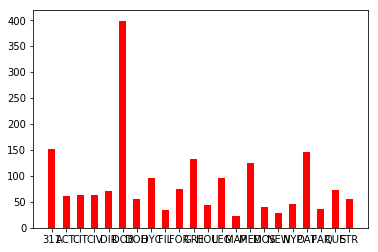

In [29]:
li=dataset_dict.keys()
new_li=[]
for l in li:
    new_li.append(l[0:3])
plt.bar(new_li, dataset_dict.values(), .5, color='r')

## Organize linking by tree

In [15]:
full_tree=sorted(full_tree)

In [16]:
from anytree import Node, RenderTree, Resolver
from anytree.search import find
resolver=Resolver('name')
dummy=Node('All_Tags')
for sublist in full_tree:#Tags
    f=find(dummy, lambda node: node.name == sublist[0] and node.depth== 1)
    if f is None:
        n=Node(sublist[0], parent=dummy)
        l=[]
        for lis in full_tree:
            if lis[1] not in l and lis[0] == n.name:
                l.append(lis[1])
            if lis[3] not in l and lis[0] == n.name:
                l.append(lis[3])
        for lis in l:
            p=Node(lis, parent=n)
            q=[]
            for li in full_tree:
                #print (li[2],"second:" ,li[4])
                #print ("next")
                if li[0] == n.name and li[1]==p.name:
                    q.append(li[2])
                if li[0] == n.name  and li[3]==p.name:
                    q.append(li[4])
            q=list(set(q))
            for li in q:
                r=Node(li, parent=p)
            
#for pre, fill, node in RenderTree(dummy):
#    print("%s%s" % (pre, node.name))

In [17]:
# from anytree import Node, RenderTree, Resolver
# from anytree.search import find
# resolver=Resolver('name')
# dummy=Node('All_Tags')
# for sublist in full_tree:#Tags
#     f=find(dummy, lambda node: node.name == sublist[0])
#     if f is None:
#         n=Node(sublist[0], parent=dummy)
# for sublist in full_tree:#Columns
#     f=find(dummy, lambda node: node.name == sublist[1])
#     if f is None:
#         g=find(dummy, lambda node: node.name == sublist[0])
#         n=Node(sublist[1], parent=g)   
#     f=find(dummy, lambda node: node.name == sublist[3])
#     if f is None:
#         g=find(dummy, lambda node: node.name == sublist[0])
#         n=Node(sublist[3], parent=g) 
# o=None
# p=None
# for sublist in full_tree:#todo fix this part up
#     try:
#         g=find(dummy, lambda node: node.name == sublist[1])
#         n=Node(sublist[2], parent=g)
#     except Exception:
#         pass
#     try:
#         g=find(dummy, lambda node: node.name == sublist[3])
#         n=Node(sublist[4], parent=g)
#     except Exception:
#         pass

In [18]:
dummy.children #all the tags should be listed

(Node('/All_Tags/DATE'),
 Node('/All_Tags/DATES'),
 Node('/All_Tags/ETHNICITY'),
 Node('/All_Tags/GENDER'),
 Node('/All_Tags/LATITUDE'),
 Node('/All_Tags/LICENSENUMBER'),
 Node('/All_Tags/LOCATION'),
 Node('/All_Tags/LONGITUDE'),
 Node('/All_Tags/NAME'),
 Node('/All_Tags/PHONE'),
 Node('/All_Tags/STREETADDRESS'),
 Node('/All_Tags/TIME'),
 Node('/All_Tags/ZIPCODE'))

In [19]:
# all_leafs=[]
# should_leafs=[]
# def get_leafs(node):
#     for child in node.children:
#         get_leafs(child)
#     if len(node.children) is 0 and node.depth is 3:
#         all_leafs.append(node)
# def should_be_leafs(node):
#     for child in node.children:
#         should_be_leafs(child)
#     if len(node.children) is 0:
#         if node.name not in should_leafs  and node.depth is 3:
#             should_leafs.append(node.name)

In [20]:
# get_leafs(dummy)
# should_be_leafs(dummy)
#print (all_leafs)

In [21]:
for pre, fill, node in RenderTree(dummy):
    print("%s%s" % (pre, node.name))

All_Tags
├── DATE
│   ├── DATE_ENTERED
│   │   └── DOB COMPLAINTS RECEIVED
│   ├── ENDDATETIME
│   │   └── FILM PERMITS
│   ├── EXPIRATION_DATE
│   │   ├── FOR HIRE VEHICLES (FHV) - ACTIVE
│   │   ├── STREET HAIL LIVERY (SHL) PERMITS
│   │   └── STREET HAIL LIVERY (SHL) DRIVERS - ACTIVE
│   ├── HEARING_DATE
│   │   └── OATH HEARINGS DIVISION CASE STATUS
│   ├── LAST_UPDATE_DATE
│   │   └── STREET HAIL LIVERY (SHL) DRIVERS - ACTIVE
│   ├── LAST_UPDATE_TIME
│   │   └── STREET HAIL LIVERY (SHL) DRIVERS - ACTIVE
│   └── STARTDATETIME
│       └── FILM PERMITS
├── DATES
│   ├── BRTH_YR
│   │   └── MOST POPULAR BABY NAMES BY SEX AND MOTHER'S ETHNIC GROUP, NEW YORK CITY
│   ├── ISSUE_DATE
│   │   └── PARKING VIOLATIONS ISSUED - FISCAL YEAR 2018
│   ├── YEAR
│   │   └── NEW YORK CITY POPULATION BY CENSUS TRACTS
│   ├── CLOSED_DATE
│   │   └── 311 SERVICE REQUESTS FROM 2010 TO PRESENT
│   ├── EXPIRATION_DATE
│   │   └── MEDALLION VEHICLES - AUTHORIZED
│   ├── INSPECTION_DATE
│   │   └── DOHMH NE

In [22]:
#This will allow working with 1 subtree by tag at a time
l=dummy.children
print (l[0])
for pre, fill, node in RenderTree(l[0]):
    print("%s%s" % (pre, node.name))

Node('/All_Tags/DATE')
DATE
├── DATE_ENTERED
│   └── DOB COMPLAINTS RECEIVED
├── ENDDATETIME
│   └── FILM PERMITS
├── EXPIRATION_DATE
│   ├── FOR HIRE VEHICLES (FHV) - ACTIVE
│   ├── STREET HAIL LIVERY (SHL) PERMITS
│   └── STREET HAIL LIVERY (SHL) DRIVERS - ACTIVE
├── HEARING_DATE
│   └── OATH HEARINGS DIVISION CASE STATUS
├── LAST_UPDATE_DATE
│   └── STREET HAIL LIVERY (SHL) DRIVERS - ACTIVE
├── LAST_UPDATE_TIME
│   └── STREET HAIL LIVERY (SHL) DRIVERS - ACTIVE
└── STARTDATETIME
    └── FILM PERMITS


In [23]:
from anytree.exporter import DotExporter
DotExporter(l[0]).to_dotfile("tree.dot")

In [24]:
#for some reason this does not work. Just use regular command prompt
#import subprocess
#subprocess.Popen('dot tree.dot -T png -o tree.png')